## Linear Regression from scratch

The goal of this exercise is to implement the linear regression algorithm. 
The dataset is about predicting salary given gpa and years of experience. 
The steps to implement are as follows.  

1.	Read the data from a file (gpa_year_experience.csv)
2.	Scale the attributes
3.	Compute the error at each iteration and save the error values in vector
4.	Plot the error vector as a curve in the end
5.	Predict a new instance.
6.  Compare with SGDRegressor
7.  Create polynomial features and predict new instance   

In [523]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [524]:
# load data and show first 5 rows
data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/gpa_years_experience.csv')
data.head()

,gpa,years_of_experience,salary
0,70,1.0,50
1,80,2.0,55
2,65,2.0,45
3,70,2.5,60
4,65,2.7,58


In [525]:
# prepare data, split columns into X and y
# X should be a numpy array of shape (m, n), use .values to convert from dataframe to numpy array
# y should be a numpy array of shape (m,), use .values to convert from dataframe to numpy array

X = data.values
y = data['salary'].values
y

array([50, 55, 45, 60, 58, 60, 65, 67, 55, 60, 65, 70, 78, 75, 78, 70, 80,
       82, 75, 85, 80, 82, 85, 90, 85])

In [526]:
# extract m and n from X using X.shape[0] to get m and X.shape[1] to get n
m = X.shape[0]
n = X.shape[1]
m,n

(25, 3)

In [527]:
# y should be a numpy array of shape (m, 1), use reshape(m, 1) to reshape y from (m,) to (m, 1)
y.reshape(m, 1)

array([[50],
       [55],
       [45],
       [60],
       [58],
       [60],
       [65],
       [67],
       [55],
       [60],
       [65],
       [70],
       [78],
       [75],
       [78],
       [70],
       [80],
       [82],
       [75],
       [85],
       [80],
       [82],
       [85],
       [90],
       [85]])

In [528]:
# normalize X using min-max scaler (sklearn.preprocessing.MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [529]:
# add dummy feature to X using scikit-learn dummy feature (sklearn.preprocessing.add_dummy_feature)
from sklearn.preprocessing import add_dummy_feature
#X = add_dummy_feature(X)
X_b = add_dummy_feature(X)
X_b

array([[1.        , 0.3125    , 0.        , 0.11111111],
       [1.        , 0.625     , 0.125     , 0.22222222],
       [1.        , 0.15625   , 0.125     , 0.        ],
       [1.        , 0.3125    , 0.1875    , 0.33333333],
       [1.        , 0.15625   , 0.2125    , 0.28888889],
       [1.        , 0.625     , 0.25      , 0.33333333],
       [1.        , 0.9375    , 0.25      , 0.44444444],
       [1.        , 1.        , 0.275     , 0.48888889],
       [1.        , 0.        , 0.3125    , 0.22222222],
       [1.        , 0.3125    , 0.3375    , 0.33333333],
       [1.        , 0.5       , 0.375     , 0.44444444],
       [1.        , 0.78125   , 0.4375    , 0.55555556],
       [1.        , 0.625     , 0.5       , 0.73333333],
       [1.        , 0.        , 0.5625    , 0.66666667],
       [1.        , 0.125     , 0.6       , 0.73333333],
       [1.        , 0.        , 0.625     , 0.55555556],
       [1.        , 0.84375   , 0.625     , 0.77777778],
       [1.        , 0.9375    ,

In [530]:
# print shapes of X and y
# X should be (m, n+1) and y should be (m, 1)
print(X.shape, y.shape)

(25, 3) (25,)


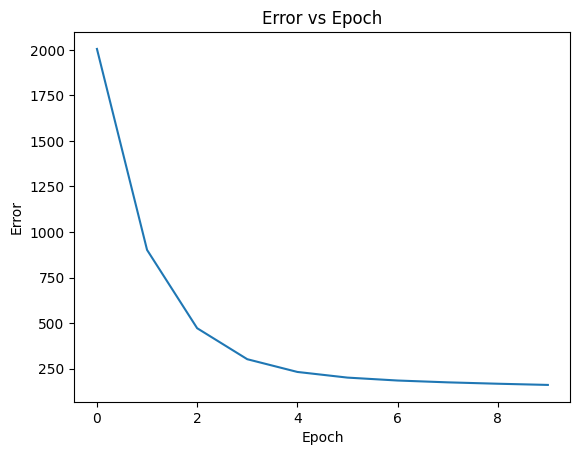

[[28.80164349 31.71147429 25.89181269 34.62130509 33.45737277 34.62130509
  37.53113589 38.69506821 31.71147429 34.62130509 37.53113589 40.44096669
  45.09669597 43.35079749 45.09669597 40.44096669 46.26062829 47.42456061
  43.35079749 49.17045909 46.26062829 47.42456061 49.17045909 52.08028989
  49.17045909]
 [11.08338737 12.24487942  9.92189532 13.40637148 12.94177466 13.40637148
  14.56786353 15.03246035 12.24487942 13.40637148 14.56786353 15.72935558
  17.58774287 16.89084764 17.58774287 15.72935558 18.05233969 18.51693651
  16.89084764 19.21383174 18.05233969 18.51693651 19.21383174 20.3753238
  19.21383174]
 [11.32362231 12.44912319 10.19812144 13.57462407 13.12442372 13.57462407
  14.70012495 15.1503253  12.44912319 13.57462407 14.70012495 15.82562582
  17.62642723 16.9511267  17.62642723 15.82562582 18.07662758 18.52682793
  16.9511267  19.20212846 18.07662758 18.52682793 19.20212846 20.32762933
  19.20212846]
 [13.73842911 15.02084523 12.456013   16.30326134 15.7902949  16.303

In [531]:
eta = 0.1 # learning rate
n_epochs = 10
np.random.seed(42) # set random seed to 42 for reproducibility

# create theta, of shape (n+1, 1) and initialize it to random values using np.random.randn
theta = np.random.randn(n+1, 1)

E = [] # list to store errors at each epoch
# compute error for initial theta and append to E


# loop over n_epochs
# for each epoch: compute gradients, update theta, compute error, append error to E
for epoch in range(n_epochs):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    E.append(np.mean((X_b.dot(theta) - y) ** 2))

# plot error vs epoch
plt.plot(E)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error vs Epoch')
plt.show()

# print final theta
print(theta)

In [532]:
# let's predict the salary for a person who has gpa=70 and years_of_experience=3. 
# create a numpy array x of shape (1, 2) with these values
# scale features using the same scaler we used earlier
# insert dummy feature using dummy feature function
# Predict salary of x
x = np.array([[70,3]])
x = scaler.fit_transform(x)
x_b = add_dummy_feature(x)
theta_best = np.linalg.inv(X.T @ X) @ X.T @ y
theta_best
y_pred = x_b @ theta_best
y_pred

array([20.05739108])

In [533]:
# Let's compare with scikit-learn's SGDRegressor
# use SGDRegressor from scikit-learn to fit the data
# use max_iter=1000, eta0=0.1, random_state=42
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, eta0=0.1, random_state=42)
sgd_reg.fit(X, y)

SGDRegressor(eta0=0.1, random_state=42)

In [534]:
# predict salary of x using sgd
predicted_salary = sgd_reg.predict(x_b)
predicted_salary

array([47.49205147])

In [535]:
# create polynomial features of degree 2 using scikit-learn PolynomialFeatures
# create X_poly using fit_transform
# create x_poly using transform
# fit the data using SGDRegressor
# predict salary of x using sgd
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
x_poly = poly_features.transform(x_b)
sgd_reg.fit(X_poly, y)
predicted_salary = sgd_reg.predict(x_poly)
predicted_salary

array([50.54390169])